<a href="https://colab.research.google.com/github/Snjkmr162/BLS_Chatbot_with_RL/blob/main/Chatbot_with_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level 1

In [2]:
pip install requests pandas matplotlib

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Defining BLS API details

In [4]:
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

SERIES_ID = "LNS14000000"  # Unemployment Rate (U-3)
START_YEAR = "2019"
END_YEAR = "2024"

Creating API request payload

In [5]:
payload = {
    "seriesid": [SERIES_ID],
    "startyear": START_YEAR,
    "endyear": END_YEAR
}

In [6]:
response = requests.post(BLS_API_URL, json=payload)

# Check request worked
print("Status Code:", response.status_code)

Status Code: 200


In [7]:
data = response.json()

# Inspect structure (important for learning)
print(data.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


Extracting the time series data

In [8]:
series_data = data["Results"]["series"][0]["data"]

# Convert to DataFrame
df = pd.DataFrame(series_data)

df.head()

,year,period,periodName,value,footnotes
0,2024,M12,December,4.1,[{}]
1,2024,M11,November,4.2,[{}]
2,2024,M10,October,4.1,[{}]
3,2024,M09,September,4.1,[{}]
4,2024,M08,August,4.2,[{}]


Cleaning the data

In [9]:
df['value'] = df['value'].astype(float)

In [10]:
df["month"] = df["period"].str[1:].astype(int)

df["date"] = pd.to_datetime(
    df["year"] + "-" + df["month"].astype(str) + "-01"
)

In [11]:
df = df.sort_values("date").reset_index(drop=True)

df.head()

,year,period,periodName,value,footnotes,month,date
0,2019,M01,January,4.0,[{}],1,2019-01-01
1,2019,M02,February,3.8,[{}],2,2019-02-01
2,2019,M03,March,3.8,[{}],3,2019-03-01
3,2019,M04,April,3.7,[{}],4,2019-04-01
4,2019,M05,May,3.6,[{}],5,2019-05-01


In [12]:
df = df[["date", "value"]]
df.rename(columns={"value": "unemployment_rate"}, inplace=True)

df.tail()

,date,unemployment_rate
67,2024-08-01,4.2
68,2024-09-01,4.1
69,2024-10-01,4.1
70,2024-11-01,4.2
71,2024-12-01,4.1


Plotting the Unemployment trend

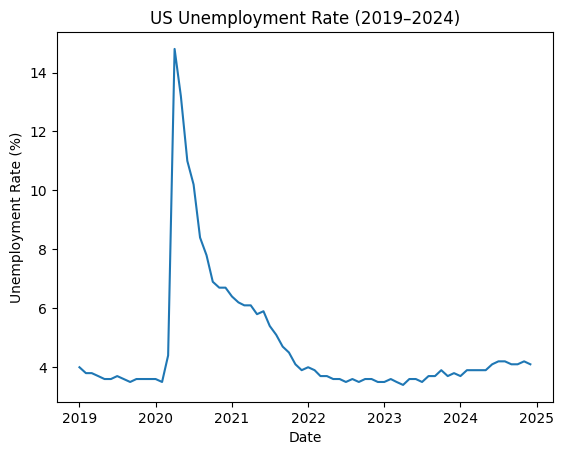

In [13]:
plt.figure()
plt.plot(df["date"], df["unemployment_rate"])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("US Unemployment Rate (2019–2024)")
plt.show()

Summary Statistics

In [14]:
print("Average unemployment rate:", df["unemployment_rate"].mean())
print("Max unemployment rate:", df["unemployment_rate"].max())
print("Min unemployment rate:", df["unemployment_rate"].min())

Average unemployment rate: 4.737500000000001
Max unemployment rate: 14.8
Min unemployment rate: 3.4


In [15]:
last_12_months = df.tail(12)

last_12_months

,date,unemployment_rate
60,2024-01-01,3.7
61,2024-02-01,3.9
62,2024-03-01,3.9
63,2024-04-01,3.9
64,2024-05-01,3.9
65,2024-06-01,4.1
66,2024-07-01,4.2
67,2024-08-01,4.2
68,2024-09-01,4.1
69,2024-10-01,4.1


In [16]:
change = (
    last_12_months["unemployment_rate"].iloc[-1]
    - last_12_months["unemployment_rate"].iloc[0]
)

print("Change over last 12 months:", round(change, 2), "%")

Change over last 12 months: 0.4 %


From 2019 to early 2020, unemployment was relatively low.

In 2020, unemployment spiked sharply due to COVID-19 disruptions.

From 2021 onward, the labor market steadily recovered, with unemployment
gradually declining and stabilizing by 2024.

Wrapping Unemployment data into a function

In [17]:
def fetch_unemployment_data(start_year, end_year):
    payload = {
        "seriesid": ["LNS14000000"],
        "startyear": start_year,
        "endyear": end_year
    }

    response = requests.post(BLS_API_URL, json=payload)
    data = response.json()

    series_data = data["Results"]["series"][0]["data"]
    df = pd.DataFrame(series_data)

    df["value"] = df["value"].astype(float)
    df["month"] = df["period"].str[1:].astype(int)

    df["date"] = pd.to_datetime(
        df["year"] + "-" + df["month"].astype(str) + "-01"
    )

    df = df.sort_values("date")
    df = df[["date", "value"]]
    df.rename(columns={"value": "unemployment_rate"}, inplace=True)

    return df

In [18]:
df = fetch_unemployment_data("2019", "2024")
df.head()

,date,unemployment_rate
71,2019-01-01,4.0
70,2019-02-01,3.8
69,2019-03-01,3.8
68,2019-04-01,3.7
67,2019-05-01,3.6


CPI Inflation

In [19]:
CPI_SERIES_ID = "CUUR0000SA0"

Wrapping Inflation data into a function

In [20]:
def fetch_bls_series(series_id, start_year, end_year):
    payload = {
        "seriesid": [series_id],
        "startyear": start_year,
        "endyear": end_year
    }

    response = requests.post(BLS_API_URL, json=payload)
    data = response.json()

    series_data = data["Results"]["series"][0]["data"]
    df = pd.DataFrame(series_data)

    df["value"] = df["value"].astype(float)
    df["month"] = df["period"].str[1:].astype(int)

    df["date"] = pd.to_datetime(
        df["year"] + "-" + df["month"].astype(str) + "-01"
    )

    df = df.sort_values("date").reset_index(drop=True)
    return df[["date", "value"]]

In [21]:
cpi_df = fetch_bls_series(
    series_id=CPI_SERIES_ID,
    start_year="2019",
    end_year="2024"
)

cpi_df.rename(columns={"value": "cpi"}, inplace=True)
cpi_df.head()

,date,cpi
0,2019-01-01,251.712
1,2019-02-01,252.776
2,2019-03-01,254.202
3,2019-04-01,255.548
4,2019-05-01,256.092


Plotting CPI

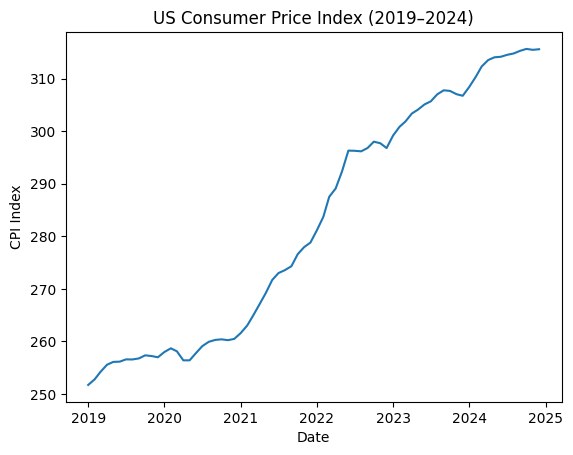

In [22]:
plt.figure()
plt.plot(cpi_df["date"], cpi_df["cpi"])
plt.xlabel("Date")
plt.ylabel("CPI Index")
plt.title("US Consumer Price Index (2019–2024)")
plt.show()

Year over year Inflation

In [23]:
cpi_df["inflation_yoy"] = cpi_df["cpi"].pct_change(periods=12) * 100

cpi_df.tail(15)

,date,cpi,inflation_yoy
57,2023-10-01,307.671,3.241145
58,2023-11-01,307.051,3.137271
59,2023-12-01,306.746,3.352123
60,2024-01-01,308.417,3.090885
61,2024-02-01,310.326,3.153171
62,2024-03-01,312.332,3.477385
63,2024-04-01,313.548,3.357364
64,2024-05-01,314.069,3.269029
65,2024-06-01,314.175,2.971397
66,2024-07-01,314.540,2.894753


Plotting Inflation

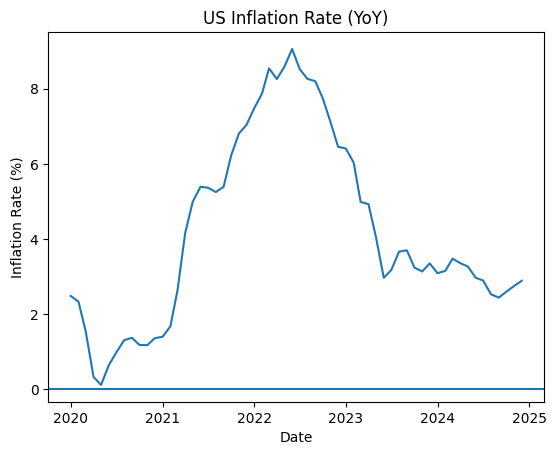

In [24]:
plt.figure()
plt.plot(cpi_df["date"], cpi_df["inflation_yoy"])
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("US Inflation Rate (YoY)")
plt.axhline(0)
plt.show()

Analyzing the recent Inflation

In [25]:
last_12 = cpi_df.dropna().tail(12)

avg_inflation = last_12["inflation_yoy"].mean()
max_inflation = last_12["inflation_yoy"].max()

print("Average inflation (last 12 months):", round(avg_inflation, 2), "%")
print("Peak inflation (last 12 months):", round(max_inflation, 2), "%")

Average inflation (last 12 months): 2.95 %
Peak inflation (last 12 months): 3.48 %


Merging both the Unemployment and Inflation data

In [26]:
combined_df = pd.merge(
    df,               # unemployment df from earlier
    cpi_df,
    on="date",
    how="inner"
)

combined_df.head()

,date,unemployment_rate,cpi,inflation_yoy
0,2019-01-01,4.0,251.712,NaN
1,2019-02-01,3.8,252.776,NaN
2,2019-03-01,3.8,254.202,NaN
3,2019-04-01,3.7,255.548,NaN
4,2019-05-01,3.6,256.092,NaN


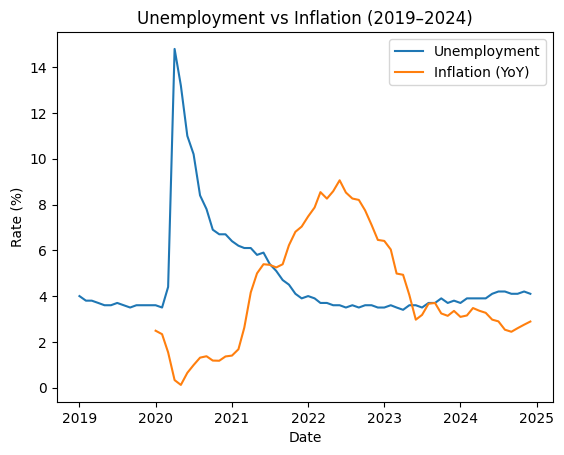

In [27]:
plt.figure()
plt.plot(combined_df["date"], combined_df["unemployment_rate"], label="Unemployment")
plt.plot(combined_df["date"], combined_df["inflation_yoy"], label="Inflation (YoY)")
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.title("Unemployment vs Inflation (2019–2024)")
plt.legend()
plt.show()

Inflation remained relatively stable before 2020, accelerated sharply after 2021 due to supply chain disruptions and increased demand, while unemployment spiked in 2020 but declined steadily as the labor market recovered.

# Level 2

In [28]:
# Unemployment
unemployment_df = fetch_bls_series("LNS14000000", "2019", "2024")
unemployment_df.rename(columns={"value": "unemployment_rate"}, inplace=True)

# CPI
cpi_df = fetch_bls_series("CUUR0000SA0", "2019", "2024")
cpi_df.rename(columns={"value": "cpi"}, inplace=True)

# Inflation (YoY)
cpi_df["inflation_yoy"] = cpi_df["cpi"].pct_change(12) * 100

In [29]:
def get_time_window(df):
    start_year = df.iloc[0]["date"].year
    end_year = df.iloc[-1]["date"].year
    return start_year, end_year

def fmt(value):
    return f"{value:.1f}"

unemployment explanation function

In [30]:
def explain_unemployment(df):
    start_year, end_year = get_time_window(df)

    start_rate = df.iloc[0]["unemployment_rate"]
    latest_rate = df.iloc[-1]["unemployment_rate"]
    peak_rate = df["unemployment_rate"].max()

    change = latest_rate - start_rate
    trend = "increased" if change > 0 else "decreased"

    explanation = (
        f"Overall, U.S. unemployment {trend} from {fmt(start_rate)}% in {start_year} "
        f"to {fmt(latest_rate)}% in {end_year}. "
        f"The unemployment rate peaked at {fmt(peak_rate)}% during the COVID-19 period, "
        "reflecting widespread job losses. "
        "Following this spike, the labor market gradually recovered as economic activity resumed. "
        "However, unemployment figures alone do not capture underemployment or workforce participation changes."
    )

    return explanation

inflation explanation function

In [31]:
def explain_inflation(df):
    recent = df.dropna().tail(12)

    avg_inflation = recent["inflation_yoy"].mean()
    peak_inflation = df["inflation_yoy"].max()

    explanation = (
        f"Inflation increased notably after 2021, with an average year-over-year rate of "
        f"{fmt(avg_inflation)}% over the past 12 months. "
        f"Inflation peaked at approximately {fmt(peak_inflation)}%, driven by supply chain disruptions, "
        "strong consumer demand, and rising energy costs. "
        "More recently, inflation has shown signs of easing, although price levels remain elevated. "
        "Inflation measures overall price changes and does not reflect cost pressures faced by individual households."
    )

    return explanation

comparison explanation function

In [32]:
def explain_comparison(unemp_df, cpi_df):
    explanation = (
        "During the early stages of the COVID-19 pandemic, unemployment rose sharply "
        "while inflation remained relatively subdued due to reduced consumer demand. "
        "As the economy reopened, unemployment declined steadily, while inflation accelerated, "
        "reflecting stronger demand and constrained supply. "
        "This pattern highlights the trade-off policymakers often face between stabilizing employment "
        "and controlling inflation, though many external factors also influence these trends."
    )

    return explanation

Simple Intent detection

In [49]:
def detect_intent(user_input):
    text = user_input.lower()

    if "unemployment" in text:
        return "UNEMPLOYMENT"
    elif "inflation" in text or "cpi" in text:
        return "INFLATION"
    elif "compare" in text or "vs" in text:
        return "COMPARISON"
    else:
        return "UNKNOWN"

Chatbot response function

In [50]:
def chatbot_response(user_input):
    intent = detect_intent(user_input)

    if intent == "UNEMPLOYMENT":
        return explain_unemployment(unemployment_df)

    elif intent == "INFLATION":
        return explain_inflation(cpi_df)

    elif intent == "COMPARISON":
        return explain_comparison(unemployment_df, cpi_df)

    else:
        return (
            "Sorry, I can currently answer questions about unemployment, "
            "inflation, or comparisons between the two."
        )

# Level 3

In [35]:
pip install scikit-learn

Define Intents

In [36]:
INTENTS = [
    "UNEMPLOYMENT",
    "INFLATION",
    "COMPARISON"
]

Training dataset

In [37]:
training_data = [
    # UNEMPLOYMENT
    ("What is happening to unemployment?", "UNEMPLOYMENT"),
    ("Explain the unemployment rate", "UNEMPLOYMENT"),
    ("Why did unemployment rise in 2020?", "UNEMPLOYMENT"),
    ("Is the labor market improving?", "UNEMPLOYMENT"),
    ("Why are jobs recovering?", "UNEMPLOYMENT"),
    ("Job growth trends in the US", "UNEMPLOYMENT"),
    ("Employment situation right now", "UNEMPLOYMENT"),
    ("Are more people finding jobs?", "UNEMPLOYMENT"),

    # INFLATION
    ("What is inflation doing?", "INFLATION"),
    ("Explain CPI trends", "INFLATION"),
    ("Why are prices increasing?", "INFLATION"),
    ("Are prices still rising?", "INFLATION"),
    ("Cost of living changes", "INFLATION"),
    ("Why is inflation high?", "INFLATION"),
    ("What is happening to consumer prices?", "INFLATION"),
    ("Is inflation slowing down?", "INFLATION"),

    # COMPARISON
    ("What is the relationship between inflation and employment?", "COMPARISON"),
    ("Explain the relationship between inflation and unemployment", "COMPARISON"),
    ("Compare inflation and employment", "COMPARISON"),
    ("How do inflation and employment relate to each other?", "COMPARISON"),
    ("How are inflation and unemployment connected?", "COMPARISON"),
    ("Does inflation affect employment?", "COMPARISON"),
]

Splitting texts and label

In [38]:
texts = [item[0] for item in training_data]
labels = [item[1] for item in training_data]

Converting text into numbers

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words="english"
)

X = vectorizer.fit_transform(texts)

Training an ML model

In [40]:
from sklearn.linear_model import LogisticRegression

intent_model = LogisticRegression()
intent_model.fit(X, labels)

LogisticRegression()

creating ML based Intent detector

In [51]:
def detect_intent_ml(user_input, threshold=0.55):
    vec = vectorizer.transform([user_input])
    probs = intent_model.predict_proba(vec)[0]

    max_prob = probs.max()
    intent = intent_model.classes_[probs.argmax()]

    if max_prob < threshold:
        return "UNKNOWN"

    return intent

Update chatbot intent logic

In [52]:
def chatbot_response(user_input):
    intent = detect_intent_ml(user_input)

    if intent == "UNEMPLOYMENT":
        return explain_unemployment(unemployment_df)

    elif intent == "INFLATION":
        return explain_inflation(cpi_df)

    elif intent == "COMPARISON":
        return explain_comparison(unemployment_df, cpi_df)

    else:
        return (
            "I’m not fully confident about that question yet. "
            "Try asking specifically about unemployment, inflation, or comparing the two."
        )

# Level 4

In [43]:
pip install transformers torch

Loading LLM

In [44]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "google/flan-t5-base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Creating a FactBuilder

In [45]:
def build_facts(intent):
    if intent == "INFLATION":
        return (
            "Inflation in the U.S. peaked at around 9.1% in 2022. "
            "It was driven by supply chain disruptions, strong consumer demand, "
            "and rising energy prices. Inflation has eased since then but prices remain elevated."
        )

    if intent == "UNEMPLOYMENT":
        return (
            "U.S. unemployment rose sharply during the COVID-19 pandemic, "
            "peaking at 14.8% in 2020. As economic activity resumed, "
            "job growth recovered and unemployment declined."
        )

    if intent == "COMPARISON":
        return (
            "Inflation and employment are often linked through wage pressure and demand. "
            "Low unemployment can increase wages, which may raise inflation. "
            "However, supply shocks and expectations can weaken this relationship."
        )

    return None

LLM Prompts

In [46]:
def generate_llm_response(user_question, facts):
    prompt = f"""
You are an economics assistant.
ONLY use the facts below.
Do NOT add new data or speculation.

Facts:
{facts}

Question:
{user_question}

Answer clearly and concisely:
"""
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True)

    outputs = llm_model.generate(
        **inputs,
        max_length=150,
        temperature=0.3
    )

    return tokenizer.decode(outputs[0], skip_special_tokens=True)

PLug into existing chatbot loop

In [53]:
intent = detect_intent_ml(user_input)

if intent == "UNKNOWN":
    print("Chatbot: I’m not fully confident about that question yet.")
else:
    facts = build_facts(intent)
    response = generate_llm_response(user_input, facts)
    print("Chatbot:", response)

NameError: name 'user_input' is not defined

In [ ]:
# Confidence buckets: 0.0–0.1, 0.1–0.2, ..., 0.9–1.0
confidence_bins = np.linspace(0, 1, 11)

# Actions: 0 = REJECT, 1 = ANSWER
Q_table = np.zeros((10, 2))

learning_rate = 0.1
discount_factor = 0.9

In [ ]:
def get_confidence_bin(confidence):
    return min(int(confidence * 10), 9)

In [ ]:
def detect_intent_with_confidence(user_input):
    vec = vectorizer.transform([user_input])
    probs = intent_model.predict_proba(vec)[0]

    max_prob = probs.max()
    intent = intent_model.classes_[probs.argmax()]

    return intent, max_prob

In [ ]:
def choose_action(confidence):
    state = get_confidence_bin(confidence)
    return np.argmax(Q_table[state])

In [ ]:
def get_reward():
    feedback = input("👍 Was this helpful? (y/n): ").strip().lower()
    return 1 if feedback == "y" else -1

In [ ]:
def update_q_table(state, action, reward):
    best_next = np.max(Q_table[state])
    Q_table[state, action] += learning_rate * (
        reward + discount_factor * best_next - Q_table[state, action]
    )

Update the chat loop

In [ ]:
intent, confidence = detect_intent_with_confidence(user_input)
state = get_confidence_bin(confidence)
action = choose_action(confidence)

# Action: REJECT
if action == 0:
    print("Chatbot: I’m not fully confident about that question yet.")
    reward = get_reward()
    update_q_table(state, action, reward)

# Action: ANSWER
else:
    facts = build_facts(intent)
    response = generate_llm_response(user_input, facts)
    print("Chatbot:", response)

    reward = get_reward()
    update_q_table(state, action, reward)

In [ ]:
import pickle

with open("q_table.pkl", "wb") as f:
    pickle.dump(Q_table, f)

In [ ]:
import os

if os.path.exists("q_table.pkl"):
    with open("q_table.pkl", "rb") as f:
        Q_table = pickle.load(f)

Adding ε Parameters

In [ ]:
# Exploration parameters
epsilon = 1.0          # start exploring a lot
epsilon_min = 0.05     # never stop exploring completely
epsilon_decay = 0.995  # decay after each interaction

Update action selection

In [ ]:
import random

def choose_action(confidence):
    state = get_confidence_bin(confidence)

    # Explore
    if random.random() < epsilon:
        return random.choice([0, 1])  # REJECT or ANSWER

    # Exploit
    return np.argmax(Q_table[state])

In [ ]:
global epsilon
epsilon = max(epsilon_min, epsilon * epsilon_decay)

Chatbot

In [ ]:
print("📊 BLS Labor Market Chatbot")
print("Ask me about unemployment, inflation, or trends.")
print("Type 'exit' to quit.\n")

while True:
    user_input = input("You: ").strip()

    if user_input.lower() == "exit":
        print("Chatbot: Goodbye!")
        break

    intent = detect_intent_ml(user_input)

    if intent == "UNKNOWN":
        print("Chatbot: I’m not fully confident about that question yet.")
    else:
        facts = build_facts(intent)
        response = generate_llm_response(user_input, facts)
        print("Chatbot:", response)

    print()